# PROYECTO 1. 
**Grupo 6**

Autores: Elena, Fer, Rubén

> Objetivo principal: 
- Analizar cohortes de usuarios definidos por el mes de creación de su primer adelanto en efectivo. 
- Seguir la evolución mensual de las métricas clave para estas cohortes (lo que permitirá a IronHack Payments obtener valiosas perspectivas sobre el comportamiento de los usuarios y el rendimiento de sus servicios financieros.)

> Métricas a Analizar

Calcularás y analizarás las siguientes métricas para cada cohorte:

1. **Frecuencia de Uso del Servicio:** Comprender con qué frecuencia los usuarios de cada cohorte utilizan los servicios de adelanto de efectivo de IronHack Payments a lo largo del tiempo.
2. **Tasa de Incidentes:** Determinar la tasa de incidentes, enfocándose específicamente en los incidentes de pago, para cada cohorte. Identificar si hay variaciones en las tasas de incidentes entre diferentes cohortes.
3. **Ingresos Generados por la Cohorte:** Calcular el total de ingresos generados por cada cohorte a lo largo de los meses para evaluar el impacto financiero del comportamiento de los usuarios.
4. **Nueva Métrica Relevante:** Proponer y calcular una nueva métrica relevante que brinde perspectivas adicionales sobre el comportamiento de los usuarios o el rendimiento de los servicios de IronHack Payments.

In [58]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from pathlib import Path
%matplotlib inline

In [59]:
sns.set_style("whitegrid")

## Load data (.csv)

In [60]:
inputs_path = Path("project_dataset")
df_cash = pd.read_csv(inputs_path / "extract - cash request - data analyst.csv")
df_fees = pd.read_csv(inputs_path / "extract - fees - data analyst - .csv")

## EDA (Exploratory Data Analysis)

In [61]:
df_cash.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


### CASH Dataframe (df_cash)

In [62]:
df_cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

#### Find NaN

In [63]:
#  Encontrar NaN
df_cash.isnull().sum()

id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
dtype: int64

In [64]:
# df_cash_nan = df_cash[df_cash['user_id'].isnull().values]
# df_cash_nan

In [65]:
# df_cash = df_cash.dropna(subset='user_id')
# df_cash

In [66]:
df_cash[~(df_cash.deleted_account_id.isnull().values)]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
7,654,100.0,rejected,2020-02-10 01:11:53.80827+00,2020-02-10 11:53:32.104131+00,NaN,2020-02-10 09:11:21.350695+00,309.0,2020-03-11 01:11:53.80793+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
8,5672,100.0,canceled,2020-06-28 12:06:33.71284+00,2020-06-28 12:06:33.712853+00,NaN,NaN,2499.0,2020-07-07 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
19,545,100.0,rejected,2020-01-29 13:53:03.343598+00,2020-02-08 06:21:16.156719+00,NaN,2020-01-29 14:39:11.563872+00,304.0,2020-02-28 13:53:03.343216+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
21,613,100.0,rejected,2020-02-05 17:37:56.852948+00,2020-02-08 06:21:16.15229+00,NaN,2020-02-06 12:48:09.880702+00,304.0,2020-03-08 17:37:56.842421+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
25,84,100.0,rejected,2019-12-11 07:30:42.567035+00,2020-01-10 16:58:06.837117+00,NaN,2020-01-10 16:58:06.830329+00,91.0,2020-01-10 07:30:42.567035+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23922,23989,25.0,money_back,2020-10-24 10:22:05.934286+00,2020-12-18 13:14:25.891447+00,NaN,NaN,29610.0,2020-11-03 10:22:40.194197+00,NaN,2020-11-16 02:57:54.235926+00,instant,2020-10-24 10:22:40.194197+00,completed,2020-11-13 22:40:42.99552+00,2020-11-16 02:57:54.252045+00
23925,22913,100.0,money_back,2020-10-21 22:00:18.904317+00,2020-12-18 13:11:15.976246+00,NaN,NaN,30404.0,2020-11-09 23:51:00+00,2020-10-23,2020-11-10 19:51:45.285165+00,instant,2020-10-21 22:00:45.462413+00,NaN,NaN,NaN
23929,22641,100.0,money_back,2020-10-21 00:46:36.5907+00,2020-12-18 13:15:45.384787+00,NaN,NaN,29911.0,2020-12-06 23:00:00+00,2020-10-22,2020-12-10 23:00:00+00,instant,2020-10-21 00:47:58.826568+00,NaN,NaN,NaN
23940,23832,25.0,money_back,2020-10-23 22:56:09.02721+00,2020-12-18 13:11:28.776102+00,NaN,NaN,29803.0,2020-12-04 23:00:00+00,2020-10-24,2020-12-08 23:00:00+00,instant,2020-10-23 22:56:42.839064+00,NaN,NaN,NaN


In [67]:
df_cash['new_user_id'] = df_cash['user_id'].fillna(df_cash['deleted_account_id']).astype(int)
df_cash.new_user_id

0          804
1          231
2          191
3          761
4         7686
         ...  
23965    13681
23966    30367
23967    82122
23968    64517
23969    44867
Name: new_user_id, Length: 23970, dtype: int64

In [68]:
df_cash['status'].value_counts()

status
money_back               16397
rejected                  6568
direct_debit_rejected      831
active                      59
transaction_declined        48
direct_debit_sent           34
canceled                    33
Name: count, dtype: int64

In [69]:
df_cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [70]:
df_cash['status'].unique()

array(['rejected', 'money_back', 'canceled', 'active',
       'direct_debit_rejected', 'transaction_declined',
       'direct_debit_sent'], dtype=object)

#### value_counts() and unique()

In [71]:
for col in df_cash.columns:
    print(f"'{col}' value_counts: {df_cash[col].value_counts()}")
    print(f"'{col}' unique: {df_cash[col].unique()}\n")

'id' value_counts: id
19886    1
5        1
19774    1
26021    1
22957    1
        ..
3512     1
2145     1
1594     1
10       1
7        1
Name: count, Length: 23970, dtype: int64
'id' unique: [    5    70     7 ... 22357 20256 19886]

'amount' value_counts: amount
100.0    16094
50.0      5304
25.0      1276
80.0       267
60.0       190
70.0       151
20.0       132
30.0       114
40.0       100
90.0        91
10.0        57
200.0       25
95.0        21
1.0         19
75.0        18
45.0        15
55.0        14
99.0        12
65.0        12
15.0        10
85.0         9
35.0         9
5.0          6
2.0          3
98.0         2
28.0         2
22.0         2
11.0         2
94.0         1
150.0        1
67.0         1
72.0         1
31.0         1
8.0          1
86.0         1
97.0         1
39.0         1
49.0         1
36.0         1
54.0         1
24.0         1
Name: count, dtype: int64
'amount' unique: [100.  99.  90.   1.  70.  25.  50.  20.  60.  80.  30.  10.  40. 150.
 

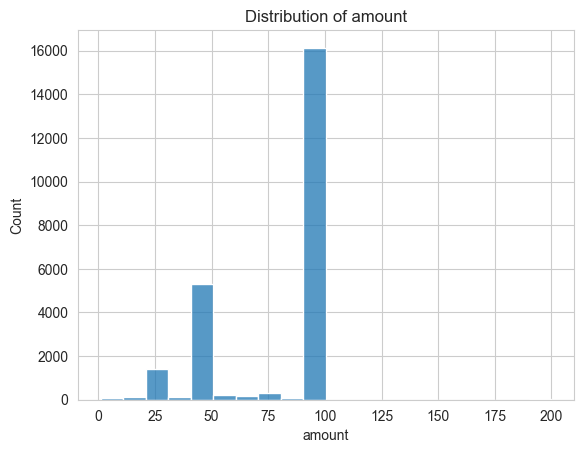

In [72]:
sns.histplot(data=df_cash, x='amount', bins=20)
plt.title("Distribution of amount")
plt.show()

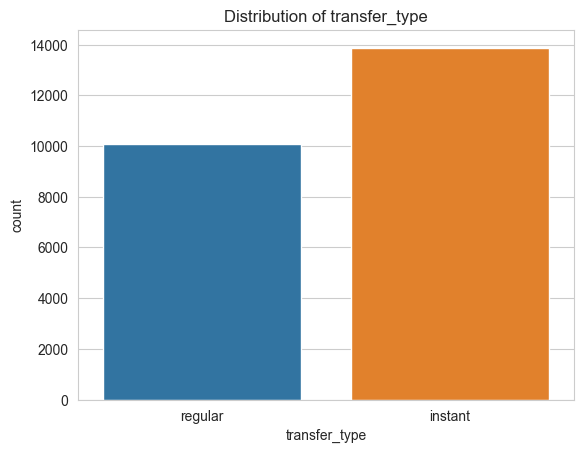

In [73]:
sns.countplot(data=df_cash, x='transfer_type', hue='transfer_type', palette='tab10')
plt.title("Distribution of transfer_type")
plt.show()

In [74]:
# Convertimos el 'created_at' de string a datetime
df_cash['created_at'] = pd.to_datetime(df_cash['created_at'])
# Obtenemos una nueva columna 'mes_año'
df_cash['month_year'] = df_cash['created_at'].dt.to_period('M')
df_cash['month_name'] = df_cash['created_at'].dt.month_name()
df_cash['year'] = df_cash['created_at'].dt.year
df_cash[['created_at', 'month_year', 'month_name', 'year']]

C:\Users\emartin4\AppData\Local\Temp\ipykernel_27268\2463115334.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_cash['month_year'] = df_cash['created_at'].dt.to_period('M')


,created_at,month_year,month_name,year
0,2019-12-10 19:05:21.596873+00:00,2019-12,December,2019
1,2019-12-10 19:50:12.347780+00:00,2019-12,December,2019
2,2019-12-10 19:13:35.825460+00:00,2019-12,December,2019
3,2019-12-10 19:16:10.880172+00:00,2019-12,December,2019
4,2020-05-06 09:59:38.877376+00:00,2020-05,May,2020
...,...,...,...,...
23965,2020-10-12 13:54:11.686225+00:00,2020-10,October,2020
23966,2020-10-27 14:41:25.734910+00:00,2020-10,October,2020
23967,2020-10-20 07:58:04.006937+00:00,2020-10,October,2020
23968,2020-10-10 05:40:55.700422+00:00,2020-10,October,2020


In [75]:
len(df_cash[df_cash['month_year'] == "2020-08"].user_id.unique())

2385

In [76]:
df_cash = df_cash.sort_values(['user_id', 'created_at', 'id'])
df_cash

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,new_user_id,month_year,month_name,year
538,1302,100.0,rejected,2020-04-20 15:50:21.187257+00:00,2020-04-22 12:03:34.439811+00,34.0,2020-04-22 12:03:34.434712+00,NaN,2020-04-27 15:50:21.18689+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,34,2020-04,April,2020
58,150,100.0,rejected,2019-12-13 20:27:38.106778+00:00,2019-12-18 15:20:41.722482+00,35.0,2019-12-18 15:20:41.715612+00,NaN,2019-12-20 20:27:38.106319+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,35,2019-12,December,2019
180,326,90.0,rejected,2019-12-28 04:00:22.349592+00:00,2019-12-29 10:17:28.378732+00,35.0,2019-12-29 10:17:28.371177+00,NaN,2020-01-04 04:00:22.34903+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,35,2019-12,December,2019
345,510,90.0,rejected,2020-01-27 19:50:46.387431+00:00,2020-01-28 14:52:30.164273+00,35.0,2020-01-28 14:52:30.160427+00,NaN,2020-02-03 19:50:46.387008+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,35,2020-01,January,2020
91,758,90.0,rejected,2020-02-28 10:51:11.440880+00:00,2020-02-28 14:13:21.50435+00,35.0,2020-02-28 14:13:21.501335+00,NaN,2020-03-07 23:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,35,2020-02,February,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6222,26747,50.0,rejected,2020-10-31 14:09:19.294845+00:00,2020-10-31 15:03:15.985841+00,NaN,2020-10-31 15:03:15.979891+00,17691.0,2020-11-28 23:51:00+00,NaN,NaN,instant,2020-10-31 14:09:28.980225+00,NaN,NaN,NaN,17691,2020-10,October,2020
23885,26783,100.0,money_back,2020-10-31 16:16:20.033708+00:00,2020-12-18 13:16:49.866282+00,NaN,NaN,25166.0,2020-11-15 16:16:37.929+00,2020-11-03,2020-11-15 19:01:47.184705+00,instant,2020-10-31 16:16:37.603328+00,NaN,NaN,NaN,25166,2020-10,October,2020
7881,26903,50.0,rejected,2020-11-01 10:54:57.095565+00:00,2020-11-01 13:18:45.027928+00,NaN,2020-11-01 13:18:45.021923+00,18049.0,2020-11-11 10:55:33.228521+00,NaN,NaN,instant,2020-11-01 10:55:33.228521+00,NaN,NaN,NaN,18049,2020-11,November,2020
9445,26951,50.0,canceled,2020-11-01 15:31:43.042915+00:00,2020-11-01 15:31:56.018161+00,NaN,NaN,17998.0,2020-11-23 23:51:00+00,NaN,NaN,instant,2020-11-01 15:31:54.041518+00,NaN,NaN,NaN,17998,2020-11,November,2020


In [77]:
df_cash['n_transaction'] = df_cash.groupby('new_user_id').cumcount() + 1
df_cash['n_transaction']

538      1
58       1
180      2
345      3
91       4
        ..
6222     1
23885    4
7881     1
9445     6
7937     4
Name: n_transaction, Length: 23970, dtype: int64

In [78]:
df_cash[['id', 'new_user_id', 'created_at', 'n_transaction']]

,id,new_user_id,created_at,n_transaction
538,1302,34,2020-04-20 15:50:21.187257+00:00,1
58,150,35,2019-12-13 20:27:38.106778+00:00,1
180,326,35,2019-12-28 04:00:22.349592+00:00,2
345,510,35,2020-01-27 19:50:46.387431+00:00,3
91,758,35,2020-02-28 10:51:11.440880+00:00,4
...,...,...,...,...
6222,26747,17691,2020-10-31 14:09:19.294845+00:00,1
23885,26783,25166,2020-10-31 16:16:20.033708+00:00,4
7881,26903,18049,2020-11-01 10:54:57.095565+00:00,1
9445,26951,17998,2020-11-01 15:31:43.042915+00:00,6


In [79]:
df_cash[df_cash['n_transaction'] == 1] # Primera transacción de cada usuario

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,new_user_id,month_year,month_name,year,n_transaction
538,1302,100.0,rejected,2020-04-20 15:50:21.187257+00:00,2020-04-22 12:03:34.439811+00,34.0,2020-04-22 12:03:34.434712+00,NaN,2020-04-27 15:50:21.18689+00,NaN,...,regular,NaN,NaN,NaN,NaN,34,2020-04,April,2020,1
58,150,100.0,rejected,2019-12-13 20:27:38.106778+00:00,2019-12-18 15:20:41.722482+00,35.0,2019-12-18 15:20:41.715612+00,NaN,2019-12-20 20:27:38.106319+00,NaN,...,regular,NaN,NaN,NaN,NaN,35,2019-12,December,2019,1
7920,3,1.0,canceled,2019-11-19 13:57:53.511561+00:00,2020-12-14 10:25:57.710844+00,47.0,2019-11-20 12:16:50+00,NaN,2019-12-05 23:00:00+00,NaN,...,regular,NaN,NaN,NaN,NaN,47,2019-11,November,2019,1
7216,200,100.0,money_back,2019-12-17 09:01:12.584634+00:00,2020-11-04 12:55:30.978572+00,52.0,2019-12-17 09:42:58.471814+00,NaN,2020-01-06 23:00:00+00,2019-12-18,...,regular,NaN,NaN,NaN,NaN,52,2019-12,December,2019,1
8114,276,100.0,money_back,2019-12-21 11:39:03.844436+00:00,2020-11-04 12:55:45.197402+00,53.0,2019-12-21 14:40:18.496859+00,NaN,2020-01-16 23:00:00+00,2019-12-24,...,regular,NaN,NaN,NaN,NaN,53,2019-12,December,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23007,26416,30.0,money_back,2020-10-30 15:53:50.411244+00:00,2020-12-18 13:14:12.603588+00,NaN,NaN,24864.0,2020-11-09 11:00:00+00,NaN,...,regular,2020-11-06 15:53:50.40677+00,NaN,NaN,NaN,24864,2020-10,October,2020,1
6402,26423,25.0,money_back,2020-10-30 16:21:25.894823+00:00,2020-12-18 13:09:04.085753+00,NaN,NaN,26242.0,2020-11-07 23:51:00+00,2020-11-03,...,instant,2020-10-30 16:22:08.441842+00,completed,2020-11-18 22:16:43.650553+00,2020-11-27 14:17:29.090258+00,26242,2020-10,October,2020,1
8189,26451,25.0,money_back,2020-10-30 16:59:12.717375+00:00,2020-12-18 13:11:16.049529+00,NaN,NaN,26551.0,2020-11-30 23:00:00+00,NaN,...,instant,2020-10-30 16:59:18.588193+00,NaN,NaN,NaN,26551,2020-10,October,2020,1
6222,26747,50.0,rejected,2020-10-31 14:09:19.294845+00:00,2020-10-31 15:03:15.985841+00,NaN,2020-10-31 15:03:15.979891+00,17691.0,2020-11-28 23:51:00+00,NaN,...,instant,2020-10-31 14:09:28.980225+00,NaN,NaN,NaN,17691,2020-10,October,2020,1


### FEES Dataframe (df_fees)

In [80]:
df_fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [9]:
df_fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [15]:
#  Encontrar NaN
df_fees.isnull().sum()

id                     0
cash_request_id        4
type                   0
status                 0
category           18865
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at             5530
from_date          13295
to_date            13295
charge_moment          0
dtype: int64

### Merge df_cash and df_fees (TODO)

In [ ]:
df_cash.merge(df_fees, left_on='id', right_on='cash_request_id', suffixes = ["_cash", "_fees"]) #TODO